In [22]:
import os
import tempfile
import shutil
import urllib
import zipfile
import pandas as pd

1.数据预处理
数据预处理任务：清洗数据，处理缺失值，提取记录。首先我们读取数据集文件并创建一个空的数据框，而后解析数据集文件记录：

In [23]:
import pandas as pd

# 读取CSV文件
def read_snap_dataset(file_path):
    # 读取CSV文件，假设文件中列名为 SOURCE, TARGET, RATING, TIME
    try:
        df = pd.read_csv(file_path, header=None, names=["SOURCE", "TARGET", "RATING", "TIME"])
        return df
    except FileNotFoundError:
        print("文件未找到，请检查文件路径是否正确。")

# 指定CSV文件路径
file_path = "./input/soc-sign-bitcoinalpha.csv"

# 读取数据集
snap_dataset = read_snap_dataset(file_path)

snap_dataset


,SOURCE,TARGET,RATING,TIME
0,7188,1,10,1407470400
1,430,1,10,1376539200
2,3134,1,10,1369713600
3,3026,1,10,1350014400
4,3010,1,10,1347854400
...,...,...,...,...
24181,7604,7601,10,1364270400
24182,7601,7604,10,1364270400
24183,7604,7602,10,1364270400
24184,7602,7604,10,1364270400


In [24]:
snap_dataset = snap_dataset.dropna()  # 删除包含缺失值的行
snap_dataset

,SOURCE,TARGET,RATING,TIME
0,7188,1,10,1407470400
1,430,1,10,1376539200
2,3134,1,10,1369713600
3,3026,1,10,1350014400
4,3010,1,10,1347854400
...,...,...,...,...
24181,7604,7601,10,1364270400
24182,7601,7604,10,1364270400
24183,7604,7602,10,1364270400
24184,7602,7604,10,1364270400


In [25]:
# 计算每个页面的访问量
page_visits = snap_dataset['TARGET'].value_counts()

# 找出最常被访问的页面
most_visited_pages = page_visits.head(30)

# 打印最常被访问的页面
print("最常被访问的用户：")
print(most_visited_pages)

最常被访问的用户：
TARGET
1       398
3       251
2       205
11      203
4       201
177     198
7       195
10      164
5       146
6       139
26      138
8       134
9       133
12      128
15      123
13      119
33      118
16      110
17      108
22      103
25      103
95      101
14       97
19       97
7603     93
7564     92
21       91
30       90
27       88
24       87
Name: count, dtype: int64


接下来，我们可以绘制访问量的分布图：

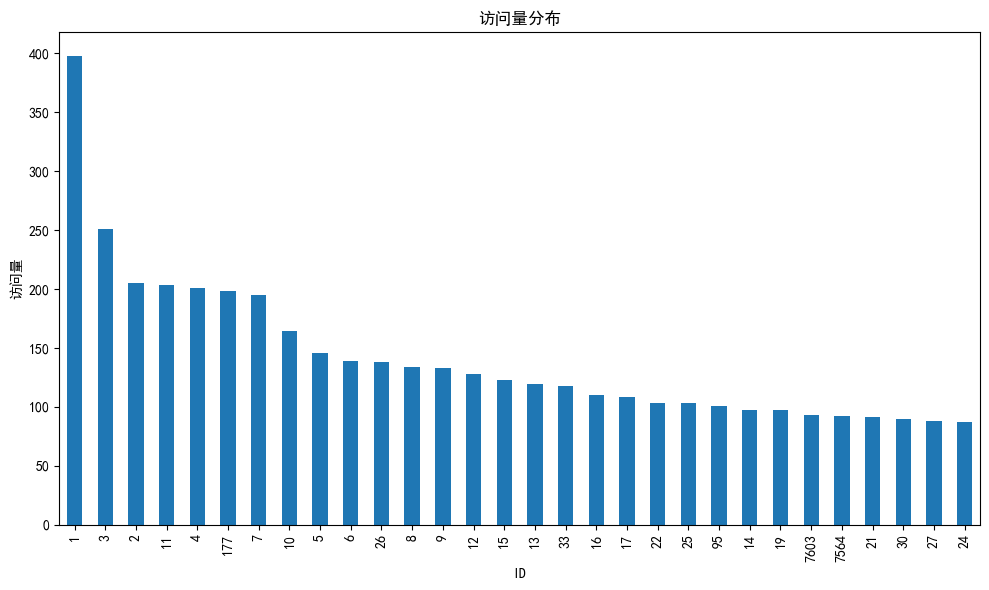

In [26]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用中文字体（示例为SimHei）

# 绘制页面访问量的分布图
plt.figure(figsize=(10, 6))
most_visited_pages.plot(kind='bar')
plt.xlabel("ID")
plt.ylabel("访问量")
plt.title("访问量分布")
plt.tight_layout()  # 自动调整图像布局
plt.show()

我们截取了最常访问的30个页面，数据差异较大。对于访问量分布，我们可以看到大多数的访问量相对较低，只有少数几个访问量较高。这符合“长尾分布”（Long Tail Distribution）的特点，即少数拥有大量的访问量，而大多数访问量较低。

3.关联规则挖掘:
关联规则挖取任务：使用Apriori算法或FP-growth算法，根据用户浏览记录计算频繁项集和关联规则。关联规则挖掘是一种常用的数据挖掘技术，可以从数据集中发现项集之间的关联关系。 在这个任务中，我们将使用Apriori算法来计算频繁项集和关联规则。

In [30]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
# 将数据集转换成适合Apriori算法处理的形式
user_data = []
last_user = '24186'
tmp = []

for index, row in snap_dataset.iterrows():
    user_id = row['SOURCE']
    vroot_id = row['TARGET']
        
    if user_id == last_user:
        tmp.append(vroot_id)
    else:
        user_data.append(tmp)
        tmp = []
        tmp.append(vroot_id)
    last_user = user_id

user_data.append(tmp)
# user_data

te = TransactionEncoder()
data_encoded = te.fit_transform(user_data)
df = pd.DataFrame(data_encoded, columns=te.columns_)

df

,1,2,3,4,5,6,7,8,9,10,...,7595,7596,7597,7598,7599,7600,7601,7602,7603,7604
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12869,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
12870,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
12871,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
12872,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [47]:
# 使用Apriori算法计算频繁项集
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# 打印频繁项集
print("Frequent Itemsets:")
# print(frequent_itemsets)
frequent_itemsets

Frequent Itemsets:


,support,itemsets
0,0.030915,(1)
1,0.015924,(2)
2,0.019497,(3)
3,0.015613,(4)
4,0.011341,(5)
...,...,...
437,0.001010,"(7602, 7604, 7598)"
438,0.001010,"(7601, 7604, 7599)"
439,0.001010,"(7602, 7604, 7599)"
440,0.001010,"(7601, 7604, 7598, 7599)"


In [49]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

# 打印关联规则
print("\nAssociation Rules:")
# print(rules)
rules


Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(47),(31),0.003418,0.005593,0.001243,0.363636,65.020202,0.001224,1.562640,0.987997
1,(47),(145),0.003418,0.006525,0.001087,0.318182,48.765152,0.001065,1.457097,0.982853
2,(136),(177),0.002563,0.015380,0.001010,0.393939,25.614019,0.000970,1.624623,0.963428
3,(7595),(177),0.003651,0.015380,0.001243,0.340426,22.134537,0.001187,1.492811,0.958320
4,(7598),(7599),0.001476,0.001476,0.001165,0.789474,534.930748,0.001163,4.742990,0.999606
...,...,...,...,...,...,...,...,...,...,...
79,"(7604, 7599)","(7602, 7598)",0.001243,0.001010,0.001010,0.812500,804.625000,0.001009,5.327948,1.000000
80,"(7598, 7599)","(7602, 7604)",0.001165,0.001165,0.001010,0.866667,743.831111,0.001008,7.491261,0.999821
81,(7602),"(7604, 7598, 7599)",0.001320,0.001165,0.001010,0.764706,656.321569,0.001008,4.245048,0.999797
82,(7598),"(7602, 7604, 7599)",0.001476,0.001010,0.001010,0.684211,677.578947,0.001008,3.163469,1.000000


In [50]:
# 计算提升度
rules['lift'] = rules['lift'].apply(lambda x: round(x, 2))

# 进行卡方检验
observed = rules['support'] * len(df)  # 观察到的频数
expected = rules['antecedent support'] * rules['consequent support'] * len(df)  # 期望频数
chi_squared = ((observed - expected) ** 2 / expected).sum()  # 计算卡方值

# 输出结果
print("关联规则提升度:")
print(rules[['antecedents', 'consequents', 'lift']])
print("\n卡方检验结果:")
print("卡方值:", chi_squared)

关联规则提升度:
     antecedents         consequents    lift
0           (47)                (31)   65.02
1           (47)               (145)   48.77
2          (136)               (177)   25.61
3         (7595)               (177)   22.13
4         (7598)              (7599)  534.93
..           ...                 ...     ...
79  (7604, 7599)        (7602, 7598)  804.62
80  (7598, 7599)        (7602, 7604)  743.83
81        (7602)  (7604, 7598, 7599)  656.32
82        (7598)  (7602, 7604, 7599)  677.58
83        (7599)  (7602, 7604, 7598)  677.58

[84 rows x 3 columns]

卡方检验结果:
卡方值: 626814.4944881184


4. 结果评估
结果评估任务：计算关联规则的支持度、置信度和提升度，得出强关联规则。 关联规则的支持度、置信度和提升度分别如上述结果中"support"、"confidence"和"lift"列所表示。可得出强关联规则有：